# IFEST UNPAD - Data Analysis Competition
Anggota Tim : 
- Jeremy
- Gerend Christopher
- Jevan Christopher
- Felix Fernando

Kamus Data

1. Nama : Nama Siswa/Mahasiswa
2. Gender : Jenis Kelamin
3. Bahasa, Inggris, TIK, Matematika, Fisika, Biologi, Geografi, Sosiologi, Antropologi :  Rata-Rata Nilai ketika sekolah
4. Extra_Kurikuler : Ekskul yang diikuti ketika sekolah
5. Tinggal_Dengen : Tempat Siswa/Mahasiswa tinggal
6. Status_Kerja : Apakah siswa/mahasiswa bekerja atau tidak
7. Biaya : Biaya kuliah
8. Tgl_Daftar_Kuliah : Tahun daftar kuliah
9. Alamat : Alamat siswa/mahasiswa
10. UKM : Jenis UKM yang diikuti ketika kuliah
11. Organisasi_Kampus : Apakah mahasiswa mengikuti organisasi kampus
12. Lama_Kuliah : Lama mahasiswa menyelesaikan kuliah (dalam tahun)


NA: Tidak ada data

## Library

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Initial Setup

Reading CSV

In [94]:
df = pd.read_csv('Data - Kualifikasi.csv', sep=';')

In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.head()

## Data Cleansing

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama               11499 non-null  object
 1   Gender             11499 non-null  object
 2   Tinggal_Dengan     7517 non-null   object
 3   Status_Kerja       11499 non-null  object
 4   Biaya              7720 non-null   object
 5   Tgl_Daftar_Kuliah  11499 non-null  int64 
 6   Alamat             11499 non-null  object
 7   UKM                11499 non-null  object
 8   Organisasi_Kampus  11499 non-null  object
 9   Lama_Kuliah        11499 non-null  object
 10  Fakultas           11499 non-null  object
dtypes: int64(1), object(10)
memory usage: 988.3+ KB


Null data plot

In [97]:
df.isna().sum()

Nama                    0
Gender                  0
Tinggal_Dengan       3982
Status_Kerja            0
Biaya                3779
Tgl_Daftar_Kuliah       0
Alamat                  0
UKM                     0
Organisasi_Kampus       0
Lama_Kuliah             0
Fakultas                0
dtype: int64

<AxesSubplot:>

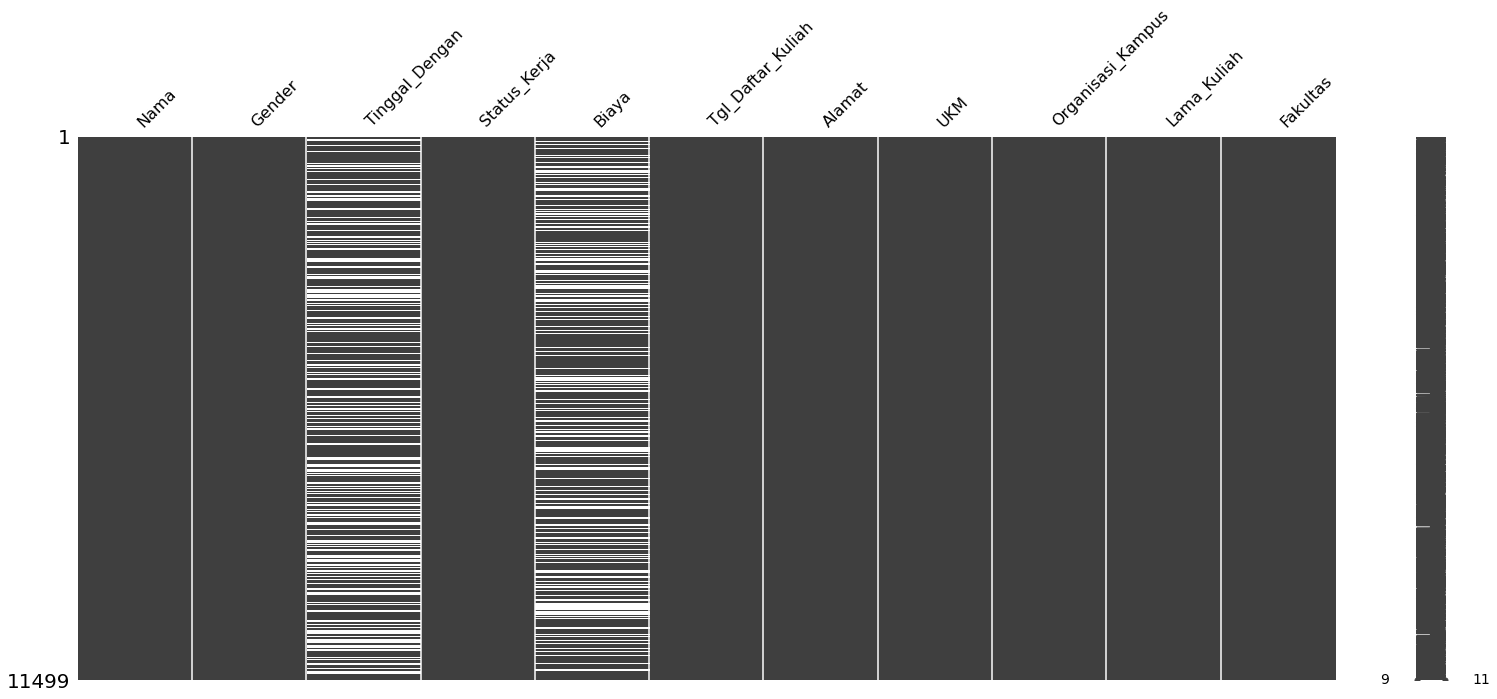

In [98]:
msno.matrix(df)

### Checking unique data of each label

In [99]:
for label in df:
    print(label + ':')
    print(df[label].unique())
    print()

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']

Gender:
['Pria' 'Wanita']

Tinggal_Dengan:
['Kos' nan 'Orang Tua']

Status_Kerja:
['Belum' 'Bekerja']

Biaya:
['Beasiswa' nan 'Orang Tua']

Tgl_Daftar_Kuliah:
[2008 2009 2007]

Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']

UKM:
['UKM_3' 'UKM_2' 'UKM_4' 'UKM_1' 'Tidak']

Organisasi_Kampus:
['Ya' 'Tidak']

Lama_Kuliah:
['3,5' '4' '4,5' '5,5' '6,5' '5' '6' '7']

Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']



### Handling null data

Asumsi : 
- Data 'Tinggal_Dengan' yang null, artinya mahasiswa tinggal 'sendiri'
- Data 'Biaya' yang null, artinya mahasiswa menggunakan biayanya secara 'mandiri'

In [100]:
df['Tinggal_Dengan'] = df['Tinggal_Dengan'].fillna('Tidak Tahu')
df['Biaya'] = df['Biaya'].fillna('Tidak Tahu')

In [101]:
df.isnull().any()

Nama                 False
Gender               False
Tinggal_Dengan       False
Status_Kerja         False
Biaya                False
Tgl_Daftar_Kuliah    False
Alamat               False
UKM                  False
Organisasi_Kampus    False
Lama_Kuliah          False
Fakultas             False
dtype: bool

Setting data type for specific label

In [102]:
for i in range(len(df)):
    df.at[i, 'Lama_Kuliah'] = float(df.at[i, 'Lama_Kuliah'].replace(',', '.')) # Setting to integer
    if df.at[i, 'Status_Kerja'] == 'Belum': 
        df.at[i, 'Status_Kerja'] = False
    elif df.at[i, 'Status_Kerja'] == 'Bekerja': 
        df.at[i, 'Status_Kerja'] = True
    if df.at[i, 'Organisasi_Kampus'] == 'Ya': 
        df.at[i, 'Organisasi_Kampus'] = True
    elif df.at[i, 'Organisasi_Kampus'] == 'Tidak': 
        df.at[i, 'Organisasi_Kampus'] = False        

df['Jenis_Kelulusan'] = ['Cepat' if df.loc[i, 'Lama_Kuliah'] == 3.5 else 'Tepat Waktu' if df.loc[i, 'Lama_Kuliah'] ==  4 else 'Telat' for i in range(len(df['Lama_Kuliah']))]
df["UKM"] = df["UKM"].replace({
    "UKM_1" : "Olahraga", 
    "UKM_2" : "Seni", 
    "UKM_3" : 'Kewirausahaan',
    "UKM_4" : 'Keilmuan'
    }
)

In [103]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Jenis_Kelulusan
0,Abbey Butler,Pria,Kos,False,Beasiswa,2008,Tangerang,Kewirausahaan,True,3.5,DKV,Cepat
1,Abbey Carpenter,Wanita,Tidak Tahu,False,Tidak Tahu,2009,Bekasi,Seni,False,4,FIKOM,Tepat Waktu
2,Abbey Dubois,Wanita,Tidak Tahu,True,Beasiswa,2008,Serang,Keilmuan,False,4.5,FIKOM,Telat
3,Abbey Gosling,Wanita,Orang Tua,False,Beasiswa,2009,Serang,Olahraga,False,5.5,DKV,Telat
4,Abbey Logan,Wanita,Orang Tua,True,Tidak Tahu,2009,Bekasi,Tidak,True,6.5,DKV,Telat


In [104]:
for label in df:
    print(label + ':')
    print(df[label].unique())
    print()

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']

Gender:
['Pria' 'Wanita']

Tinggal_Dengan:
['Kos' 'Tidak Tahu' 'Orang Tua']

Status_Kerja:
[False True]

Biaya:
['Beasiswa' 'Tidak Tahu' 'Orang Tua']

Tgl_Daftar_Kuliah:
[2008 2009 2007]

Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']

UKM:
['Kewirausahaan' 'Seni' 'Keilmuan' 'Olahraga' 'Tidak']

Organisasi_Kampus:
[True False]

Lama_Kuliah:
[3.5 4.0 4.5 5.5 6.5 5.0 6.0 7.0]

Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']

Jenis_Kelulusan:
['Cepat' 'Tepat Waktu' 'Telat']



## Changing Data Types

In [105]:
df = df.astype({'Status_Kerja': 'bool', 'Organisasi_Kampus': 'bool', 'Lama_Kuliah': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               11499 non-null  object 
 1   Gender             11499 non-null  object 
 2   Tinggal_Dengan     11499 non-null  object 
 3   Status_Kerja       11499 non-null  bool   
 4   Biaya              11499 non-null  object 
 5   Tgl_Daftar_Kuliah  11499 non-null  int64  
 6   Alamat             11499 non-null  object 
 7   UKM                11499 non-null  object 
 8   Organisasi_Kampus  11499 non-null  bool   
 9   Lama_Kuliah        11499 non-null  float64
 10  Fakultas           11499 non-null  object 
 11  Jenis_Kelulusan    11499 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 920.9+ KB


## EDA

Statistika Deskriptif

In [106]:
df.describe()

,Tgl_Daftar_Kuliah,Lama_Kuliah
count,11499.000000,11499.000000
mean,2007.996348,5.245804
std,0.816630,1.143226
min,2007.000000,3.500000
25%,2007.000000,4.500000
50%,2008.000000,5.000000
75%,2009.000000,6.000000
max,2009.000000,7.000000


Count lama kuliah untuk masing-masing gender 

<AxesSubplot:xlabel='Lama_Kuliah', ylabel='count'>

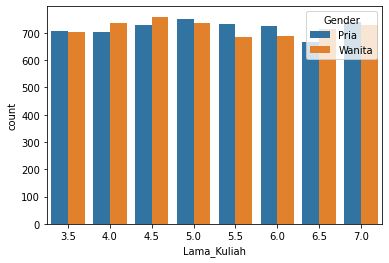

In [107]:
sns.countplot(data=df, x='Lama_Kuliah', hue='Gender')

Count plot setiap kolom

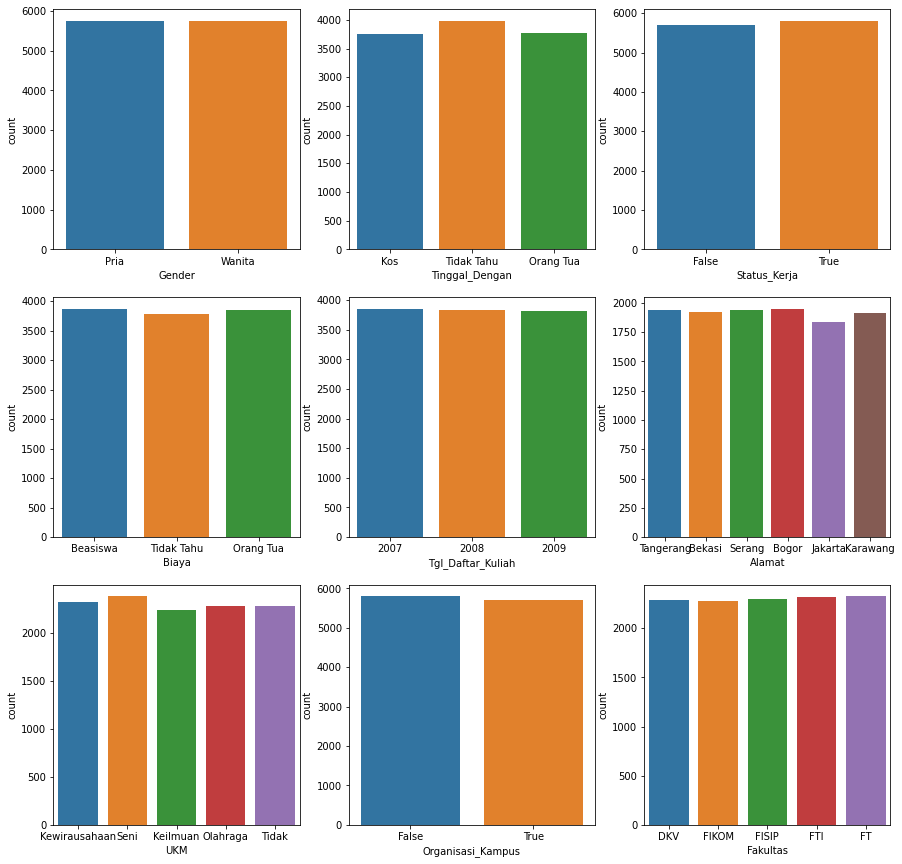

In [108]:
cols = ['Gender', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Tgl_Daftar_Kuliah', 
        'Alamat', 'UKM', 'Organisasi_Kampus', 'Fakultas']

plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col)

Countplot lama kuliah terkait dengan kolom

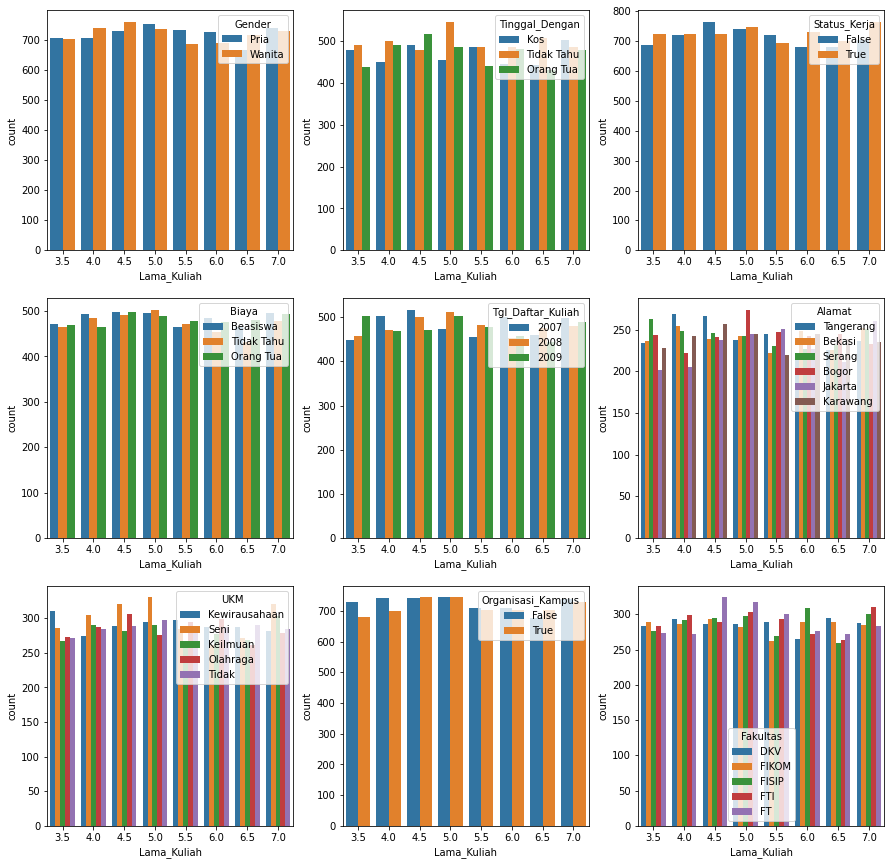

In [109]:
cols = ['Gender', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Tgl_Daftar_Kuliah', 
        'Alamat', 'UKM', 'Organisasi_Kampus', 'Fakultas']

plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x='Lama_Kuliah', hue=col)

Countplot lulus tepat waktu dan tidak tepat waktu

<AxesSubplot:xlabel='Jenis_Kelulusan', ylabel='count'>

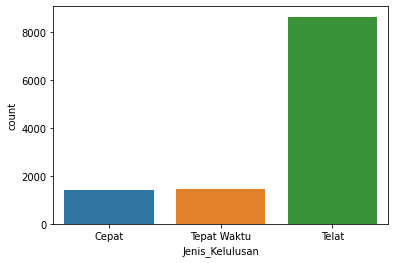

In [110]:
sns.countplot(data=df, x='Jenis_Kelulusan')

Plot masing 

## Data Preparation

### One-Hot Encoding

In [111]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Jenis_Kelulusan
0,Abbey Butler,Pria,Kos,False,Beasiswa,2008,Tangerang,Kewirausahaan,True,3.5,DKV,Cepat
1,Abbey Carpenter,Wanita,Tidak Tahu,False,Tidak Tahu,2009,Bekasi,Seni,False,4.0,FIKOM,Tepat Waktu
2,Abbey Dubois,Wanita,Tidak Tahu,True,Beasiswa,2008,Serang,Keilmuan,False,4.5,FIKOM,Telat
3,Abbey Gosling,Wanita,Orang Tua,False,Beasiswa,2009,Serang,Olahraga,False,5.5,DKV,Telat
4,Abbey Logan,Wanita,Orang Tua,True,Tidak Tahu,2009,Bekasi,Tidak,True,6.5,DKV,Telat


In [151]:
gender = pd.get_dummies(df.Gender, prefix='Gender')
ukm = pd.get_dummies(df.UKM, prefix='UKM')
ukm.head()
fak = pd.get_dummies(df.Fakultas, prefix='Fakultas')
alamat = pd.get_dummies(df.Alamat, prefix='Alamat')
tinggal = pd.get_dummies(df.Tinggal_Dengan, prefix='Tinggal')
biaya = pd.get_dummies(df.Biaya, prefix='Biaya')
kerja = pd.get_dummies(df.Status_Kerja, prefix='Kerja')
org = pd.get_dummies(df.Organisasi_Kampus, prefix='Organisasi')
biaya = pd.get_dummies(df.Biaya, prefix='Biaya')

In [152]:
encoding = pd.concat([gender, ukm, fak, alamat, tinggal, kerja, org, biaya], axis=1, join='inner')

encoding.head()

,Gender_Pria,Gender_Wanita,UKM_Keilmuan,UKM_Kewirausahaan,UKM_Olahraga,UKM_Seni,UKM_Tidak,Fakultas_DKV,Fakultas_FIKOM,Fakultas_FISIP,...,Tinggal_Kos,Tinggal_Orang Tua,Tinggal_Tidak Tahu,Kerja_False,Kerja_True,Organisasi_False,Organisasi_True,Biaya_Beasiswa,Biaya_Orang Tua,Biaya_Tidak Tahu
0,1,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
2,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,1,0,0
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1


In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


In [154]:
# split dataset
X = encoding
y = df["Lama_Kuliah"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)


In [176]:
clf = DecisionTreeRegressor(random_state=1)
clf.fit(X_train, y_train)

r = permutation_importance(clf, X_val, y_val, n_repeats=10, random_state=0)

feature = pd.DataFrame()

for i, val in enumerate(encoding.columns):
    feature.at[i, 'label'] = val
    feature.at[i, 'weight'] = r['importances_mean'][i]


In [177]:
feature.sort_values(by='weight', ascending=False)

,label,weight
5,UKM_Seni,0.032948
22,Kerja_True,0.027563
1,Gender_Wanita,0.021499
11,Fakultas_FTI,0.019724
17,Alamat_Tangerang,0.014548
10,Fakultas_FT,0.014259
27,Biaya_Tidak Tahu,0.009032
12,Alamat_Bekasi,0.005636
15,Alamat_Karawang,0.002711
4,UKM_Olahraga,0.002303
